EM 算法相当于一个聚类框架，里面有不同的聚类模型，比如 GMM 高斯混合模型，或者 HMM 隐马尔科夫模型。其中你需要理解的是 EM 的两个步骤，E 步和 M 步：E 步相当于通过初始化的参数来估计隐含变量，M 步是通过隐含变量来反推优化参数。最后通过 EM 步骤的迭代得到最终的模型参数。

今天我们进行 EM 算法的实战，你需要思考的是：
* 如何使用 EM 算法工具完成聚类？
* 什么情况下使用聚类算法？我们用聚类算法的任务目标是什么？
* 面对王者荣耀的英雄数据，EM 算法能帮助我们分析出什么？

**如何使用 EM 工具包**
在 Python 中有第三方的 EM 算法工具包。由于 EM 算法是一个聚类框架，所以你需要明确你要用的具体算法，比如是采用 GMM 高斯混合模型，还是 HMM 隐马尔科夫模型。

这节课我们主要讲解 GMM 的使用，在使用前你需要引入工具包：
```
from sklearn.mixture import GaussianMixture
```

我们看下如何在 sklearn 中创建 GMM 聚类。

首先我们使用
```gmm = GaussianMixture(n_components=1, covariance_type=‘full’, max_iter=100)```来创建 GMM 聚类，其中有几个比较主要的参数（GMM 类的构造参数比较多，我筛选了一些主要的进行讲解），我分别来讲解下：
1.n_components：即高斯混合模型的个数，也就是我们要聚类的个数，默认值为 1。如果你不指定 n_components，最终的聚类结果都会为同一个值。

2.covariance_type：代表协方差类型。一个高斯混合模型的分布是由均值向量和协方差矩阵决定的，所以协方差的类型也代表了不同的高斯混合模型的特征。协方差类型有 4 种取值：
* covariance_type=full，代表完全协方差，也就是元素都不为 0；
* covariance_type=tied，代表相同的完全协方差；
* covariance_type=diag，代表对角协方差，也就是对角不为 0，其余为 0；
* covariance_type=spherical，代表球面协方差，非对角为 0，对角完全相同，呈现球面的特性。

3.max_iter：代表最大迭代次数，EM 算法是由 E 步和 M 步迭代求得最终的模型参数，这里可以指定最大迭代次数，默认值为 100。

创建完 GMM 聚类器之后，我们就可以传入数据让它进行迭代拟合。

我们使用 fit 函数，传入样本特征矩阵，模型会自动生成聚类器，然后使用 prediction=gmm.predict(data) 来对数据进行聚类，传入你想进行聚类的数据，可以得到聚类结果 prediction。

你能看出来拟合训练和预测可以传入相同的特征矩阵，这是因为聚类是无监督学习，你不需要事先指定聚类的结果，也无法基于先验的结果经验来进行学习。只要在训练过程中传入特征值矩阵，机器就会按照特征值矩阵生成聚类器，然后就可以使用这个聚类器进行聚类了。

**如何用 EM 算法对王者荣耀数据进行聚类**

了解了 GMM 聚类工具之后，我们看下如何对王者荣耀的英雄数据进行聚类。

首先我们知道聚类的原理是“人以群分，物以类聚”。通过聚类算法把特征值相近的数据归为一类，不同类之间的差异较大，这样就可以对原始数据进行降维。通过分成几个组（簇），来研究每个组之间的特性。或者我们也可以把组（簇）的数量适当提升，这样就可以找到可以互相替换的英雄，比如你的对手选择了你擅长的英雄之后，你可以选择另一个英雄作为备选。

我们先看下数据长什么样子：

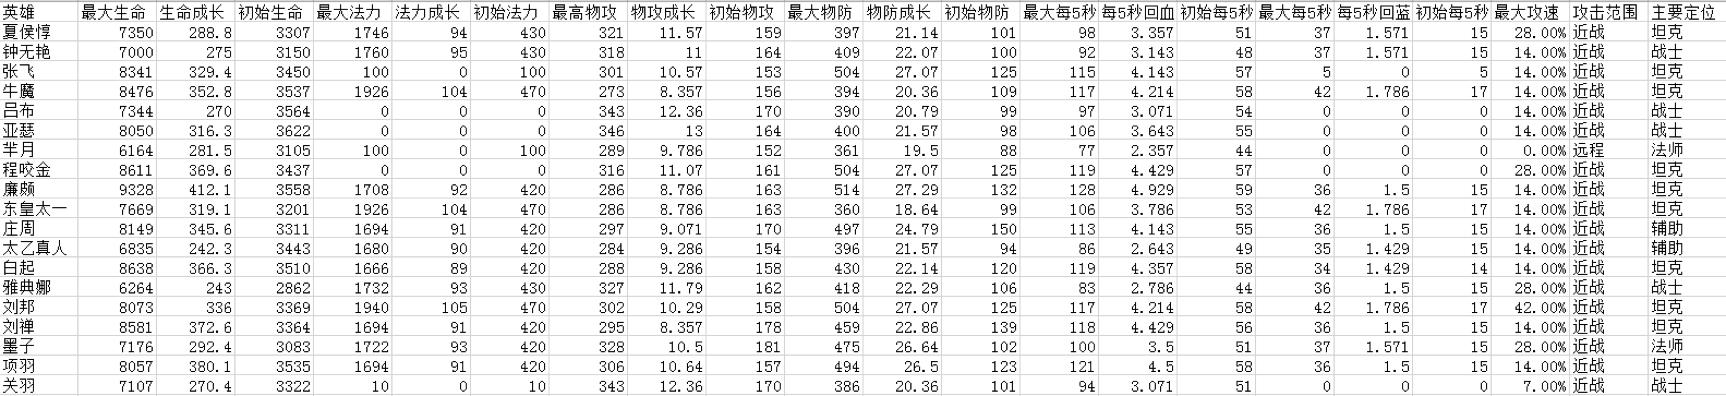

这里我们收集了 69 名英雄的 20 个特征属性，这些属性分别是最大生命、生命成长、初始生命、最大法力、法力成长、初始法力、最高物攻、物攻成长、初始物攻、最大物防、物防成长、初始物防、最大每 5 秒回血、每 5 秒回血成长、初始每 5 秒回血、最大每 5 秒回蓝、每 5 秒回蓝成长、初始每 5 秒回蓝、最大攻速和攻击范围等。

现在我们需要对王者荣耀的英雄数据进行聚类，我们先设定项目的执行流程：

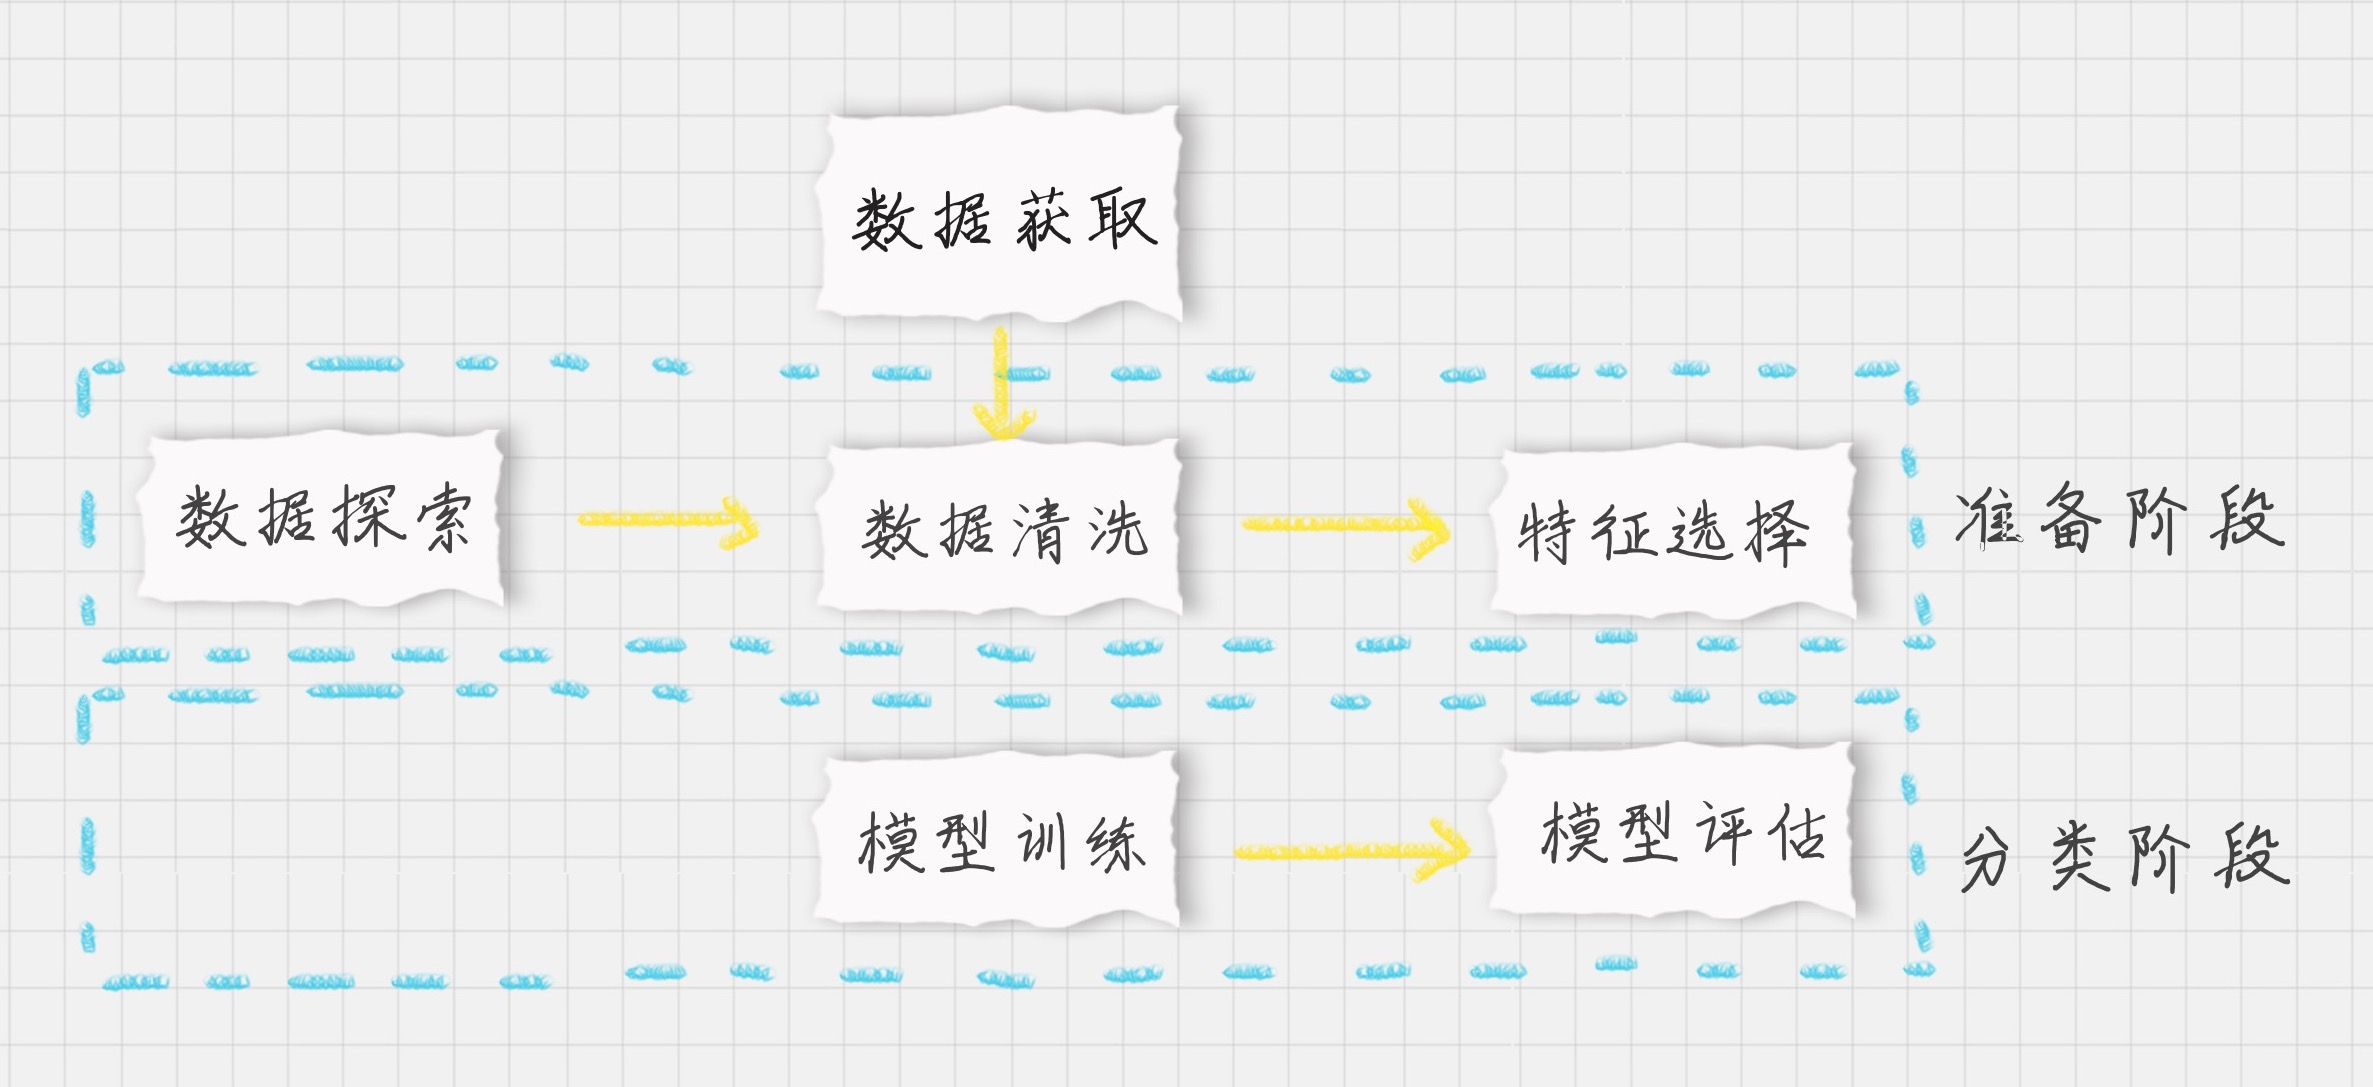

* 1、首先我们需要加载数据源；
* 2、在准备阶段，我们需要对数据进行探索，包括采用数据可视化技术，让我们对英雄属性以及这些属性之间的关系理解更加深刻，然后对数据质量进行评估，是否进行数据清洗，最后进行特征选择方便后续的聚类算法；
* 3、聚类阶段：选择适合的聚类模型，这里我们采用 GMM 高斯混合模型进行聚类，并输出聚类结果，对结果进行分析。

按照上面的步骤，我们来编写下代码。完整的代码如下：

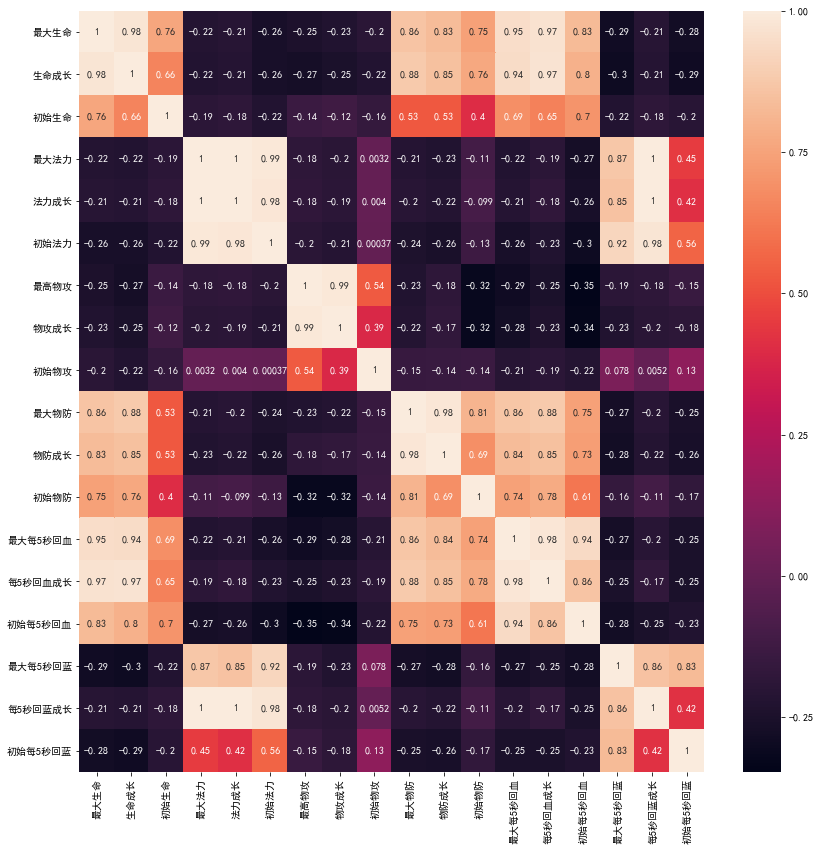

[ 7 13  5 24  9  9 12  5  4  3 14 18 24 23 24 14 28 24  1 25 15  6 25  6
  6  6 25 16 19 10 23 19  2 19 19 19 19  8 10 27  2 11 19  2 19  2 18 10
 18 19 17 13  1  0  0  7  7 13 22  9  7 26 21  7 20 29 29 13 16]


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [2]:

# -*- coding: utf-8 -*-
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
 
# 数据加载，避免中文乱码问题
data_ori = pd.read_csv('./heros.csv', encoding = 'gb18030')
features = [u'最大生命',u'生命成长',u'初始生命',u'最大法力', u'法力成长',u'初始法力',u'最高物攻',u'物攻成长',u'初始物攻',u'最大物防',u'物防成长',u'初始物防', u'最大每5秒回血', u'每5秒回血成长', u'初始每5秒回血', u'最大每5秒回蓝', u'每5秒回蓝成长', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
data = data_ori[features]
 
# 对英雄属性之间的关系进行可视化分析
# 设置plt正确显示中文
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
# 用热力图呈现features_mean字段之间的相关性
corr = data[features].corr()
plt.figure(figsize=(14,14))
# annot=True显示每个方格的数据
sns.heatmap(corr, annot=True)
plt.show()
 
# 相关性大的属性保留一个，因此可以对属性进行降维
features_remain = [u'最大生命', u'初始生命', u'最大法力', u'最高物攻', u'初始物攻', u'最大物防', u'初始物防', u'最大每5秒回血', u'最大每5秒回蓝', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
data = data_ori[features_remain]
data[u'最大攻速'] = data[u'最大攻速'].apply(lambda x: float(x.strip('%'))/100)
data[u'攻击范围']=data[u'攻击范围'].map({'远程':1,'近战':0})
# 采用Z-Score规范化数据，保证每个特征维度的数据均值为0，方差为1
ss = StandardScaler()
data = ss.fit_transform(data)
# 构造GMM聚类
gmm = GaussianMixture(n_components=30, covariance_type='full')
gmm.fit(data)
# 训练数据
prediction = gmm.predict(data)
print(prediction)
# 将分组结果输出到CSV文件中
data_ori.insert(0, '分组', prediction)
data_ori.to_csv('./hero_out.csv', index=False, sep=',')

同时你也能看到输出的聚类结果文件 hero_out.csv（它保存在你本地运行的文件夹里，程序会自动输出这个文件，你可以自己看下）。

我来简单讲解下程序的几个模块。

**关于引用包**

    首先我们会用 DataFrame 数据结构来保存读取的数据，最后的聚类结果会写入到 CSV 文件中，因此会用到 pandas 和 CSV 工具包。另外我们需要对数据进行可视化，采用热力图展现属性之间的相关性，这里会用到 matplotlib.pyplot 和 seaborn 工具包。在数据规范化中我们使用到了 Z-Score 规范化，用到了 StandardScaler 类，最后我们还会用到 sklearn 中的 GaussianMixture 类进行聚类。

**数据可视化的探索**

    你能看到我们将 20 个英雄属性之间的关系用热力图呈现了出来，中间的数字代表两个属性之间的关系系数，最大值为 1，代表完全正相关，关系系数越大代表相关性越大。从图中你能看出来“最大生命”“生命成长”和“初始生命”这三个属性的相关性大，我们只需要保留一个属性即可。同理我们也可以对其他相关性大的属性进行筛选，保留一个。你在代码中可以看到，我用 features_remain 数组保留了特征选择的属性，这样就将原本的 20 个属性降维到了 13 个属性。

**关于数据规范化**

    我们能看到“最大攻速”这个属性值是百分数，不适合做矩阵运算，因此我们需要将百分数转化为小数。我们也看到“攻击范围”这个字段的取值为远程或者近战，也不适合矩阵运算，我们将取值做个映射，用 1 代表远程，0 代表近战。然后采用 Z-Score 规范化，对特征矩阵进行规范化。
    
**在聚类阶段**
    
    我们采用了 GMM 高斯混合模型，并将结果输出到 CSV 文件中。这里我将输出的结果截取了一段（设置聚类个数为 30）：

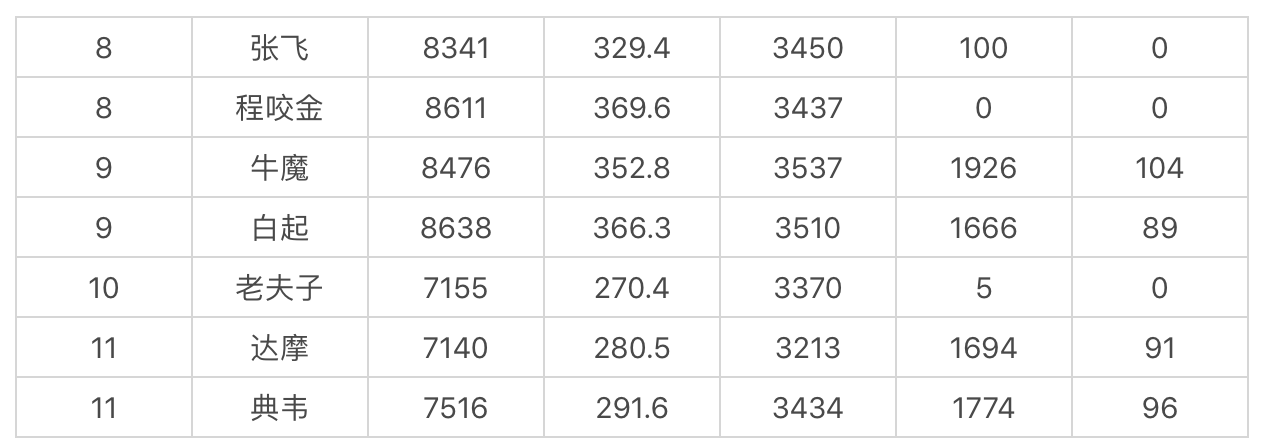

    第一列代表的是分组（簇），我们能看到张飞、程咬金分到了一组，牛魔、白起是一组，老夫子自己是一组，达摩、典韦是一组。聚类的特点是相同类别之间的属性值相近，不同类别的属性值差异大。因此如果你擅长用典韦这个英雄，不防试试达摩这个英雄。同样你也可以在张飞和程咬金中进行切换。这样就算你的英雄被别人选中了，你依然可以有备选的英雄可以使用。

**总结**

今天我带你一起做了 EM 聚类的实战，具体使用的是 GMM 高斯混合模型。从整个流程中可以看出，我们需要经过数据加载、数据探索、数据可视化、特征选择、GMM 聚类和结果分析等环节。

聚类和分类不一样，聚类是无监督的学习方式，也就是我们没有实际的结果可以进行比对，所以聚类的结果评估不像分类准确率一样直观，那么有没有聚类结果的评估方式呢？这里我们可以采用 Calinski-Harabaz 指标，代码如下：
```
from sklearn.metrics import calinski_harabaz_score
print(calinski_harabaz_score(data, prediction))
```

指标分数越高，代表聚类效果越好，也就是相同类中的差异性小，不同类之间的差异性大。当然具体聚类的结果含义，我们需要人工来分析，也就是当这些数据被分成不同的类别之后，具体每个类表代表的含义。

另外聚类算法也可以作为其他数据挖掘算法的预处理阶段，这样我们就可以将数据进行降维了。

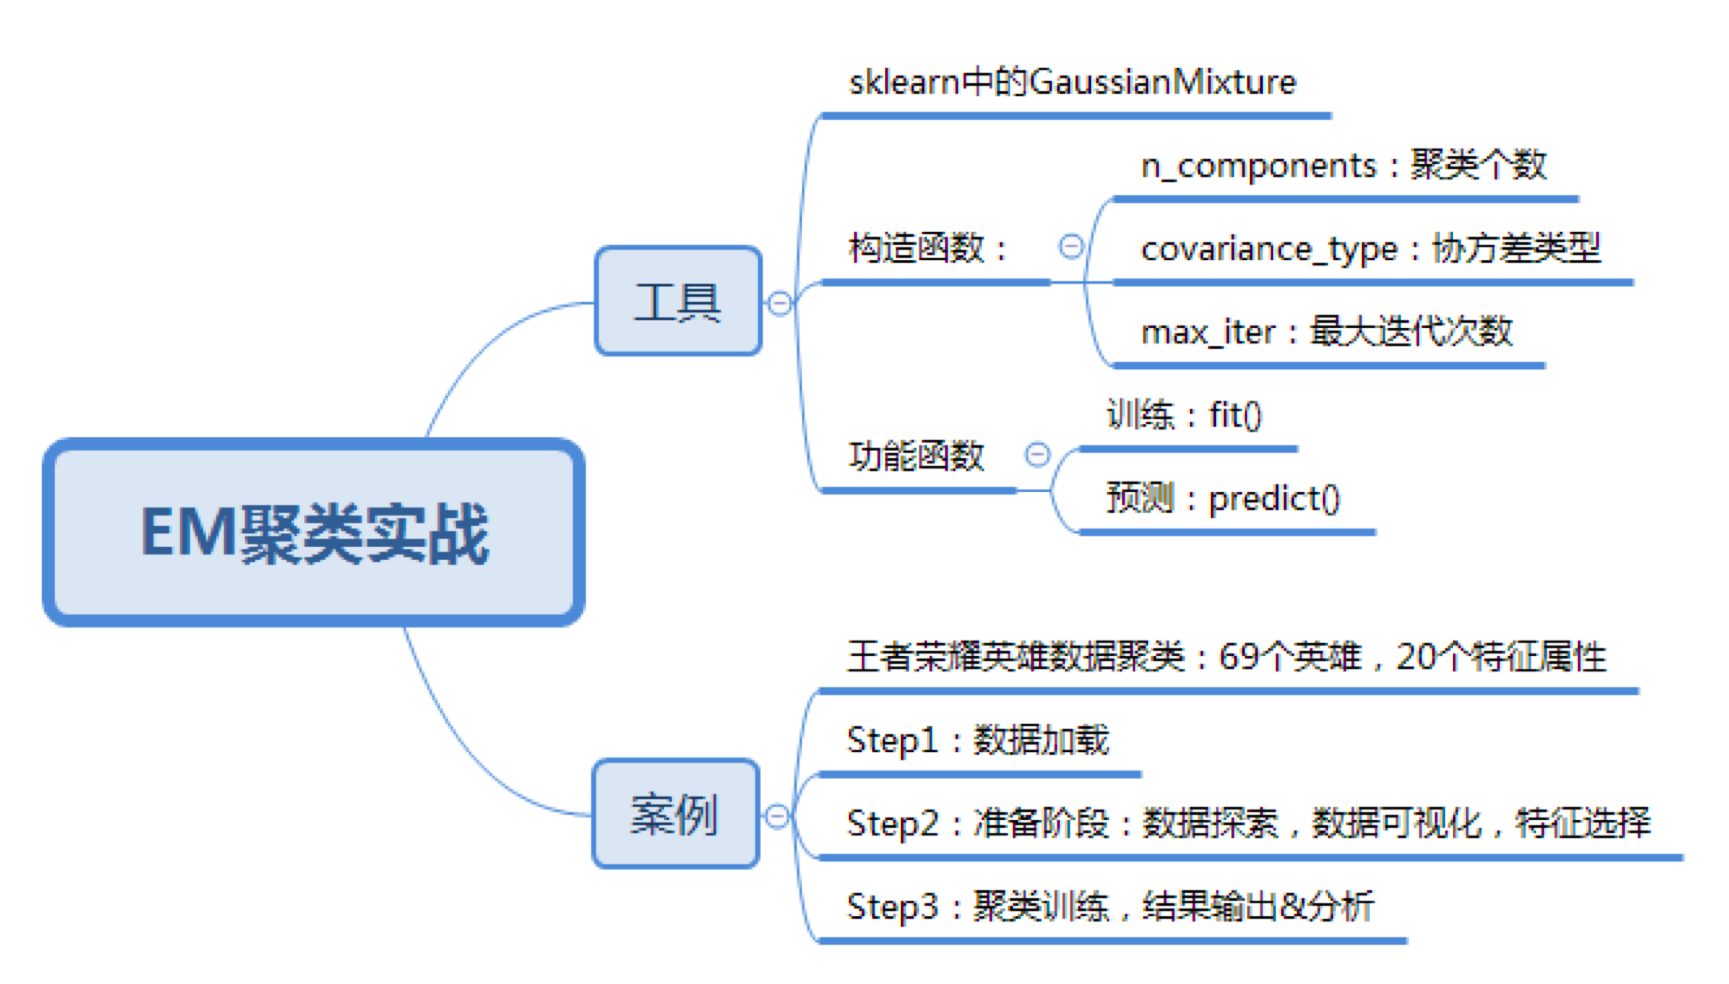

最后依然是两道思考题。针对王者荣耀的英雄数据集，我进行了特征选择，实际上王者荣耀的英雄数量并不多，我们可以省略特征选择这个阶段，你不妨用全部的特征值矩阵进行聚类训练，来看下聚类得到的结果。第二个问题是，依然用王者荣耀英雄数据集，在聚类个数为 3 以及聚类个数为 30 的情况下，请你使用 GMM 高斯混合模型对数据集进行聚类，并得出 Calinski_Harabaz 分数。

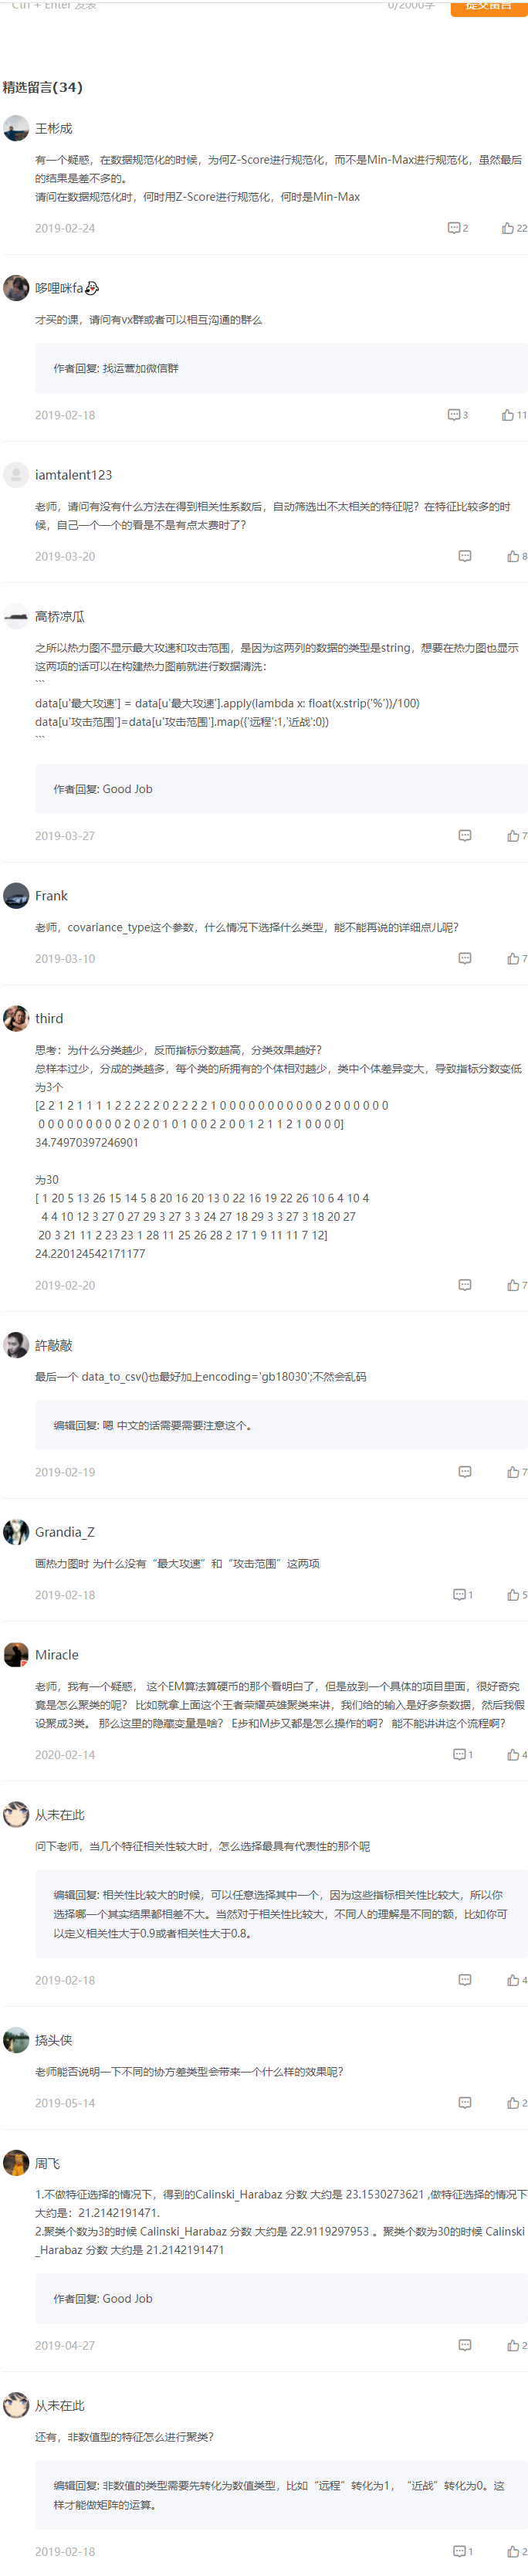